# 01. Importing libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# project folder path
path = r'/Users/achestnut/Desktop/Instacart Data Analysis'

In [3]:
# import combined customers orders products data
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

In [4]:
df_combined.shape

(32404859, 34)

# 02. Address PII data

In [5]:
# check for PII data
df_combined.head()

order_id user_id eval_set  order_number  orders_day_of_week  hour_of_order  \
0   2539329       1    prior             1                   2              8   
1   2398795       1    prior             2                   3              7   
2    473747       1    prior             3                   3             12   
3   2254736       1    prior             4                   4              7   
4    431534       1    prior             5                   4             15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     0.0         196                  1          0  ...   
1                    15.0         196                  1          1  ...   
2                    21.0         196                  1          1  ...   
3                    29.0         196                  1          1  ...   
4                    28.0         196                  1          1  ...   

     frequency_flag  first_name  last_name  gender    state age date_joined  \
0  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
1  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
2  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
3  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   
4  Regular customer       Linda     Nguyen  Female  Alabama  31   2/17/2019   

  number_of_dependants marital_status  income  
0                    3        married   40423  
1                    3        married   40423  
2                    3        married   40423  
3                    3        married   40423  
4                    3        married   40423  

[5 rows x 34 columns]

In [6]:
# drop 'first_name' and 'last_name' columns
df = df_combined.drop(columns = ['first_name', 'last_name'])

In [7]:
# check output
df.head()

order_id user_id eval_set  order_number  orders_day_of_week  hour_of_order  \
0   2539329       1    prior             1                   2              8   
1   2398795       1    prior             2                   3              7   
2    473747       1    prior             3                   3             12   
3   2254736       1    prior             4                   4              7   
4    431534       1    prior             5                   4             15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     0.0         196                  1          0  ...   
1                    15.0         196                  1          1  ...   
2                    21.0         196                  1          1  ...   
3                    29.0         196                  1          1  ...   
4                    28.0         196                  1          1  ...   

  spending_flag  median_days    frequency_flag  gender    state age  \
0   Low spender         20.0  Regular customer  Female  Alabama  31   
1   Low spender         20.0  Regular customer  Female  Alabama  31   
2   Low spender         20.0  Regular customer  Female  Alabama  31   
3   Low spender         20.0  Regular customer  Female  Alabama  31   
4   Low spender         20.0  Regular customer  Female  Alabama  31   

  date_joined number_of_dependants marital_status  income  
0   2/17/2019                    3        married   40423  
1   2/17/2019                    3        married   40423  
2   2/17/2019                    3        married   40423  
3   2/17/2019                    3        married   40423  
4   2/17/2019                    3        married   40423  

[5 rows x 32 columns]

In [8]:
df.shape

(32404859, 32)

# 03. Regional segmentation of data

In [9]:
# create 'region' column based on 'state' column
region = []

for value in df['state']:
    if value in ['Maine', 'New Hampshire', 'Vermon', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indian', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [10]:
df['region'] = region

In [11]:
# check output
df['region'].value_counts(dropna = False)

South        10791885
West          9531920
Midwest       6970043
Northeast     5111011
Name: region, dtype: int64

In [12]:
df.head()

order_id user_id eval_set  order_number  orders_day_of_week  hour_of_order  \
0   2539329       1    prior             1                   2              8   
1   2398795       1    prior             2                   3              7   
2    473747       1    prior             3                   3             12   
3   2254736       1    prior             4                   4              7   
4    431534       1    prior             5                   4             15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     0.0         196                  1          0  ...   
1                    15.0         196                  1          1  ...   
2                    21.0         196                  1          1  ...   
3                    29.0         196                  1          1  ...   
4                    28.0         196                  1          1  ...   

  median_days    frequency_flag  gender    state age date_joined  \
0        20.0  Regular customer  Female  Alabama  31   2/17/2019   
1        20.0  Regular customer  Female  Alabama  31   2/17/2019   
2        20.0  Regular customer  Female  Alabama  31   2/17/2019   
3        20.0  Regular customer  Female  Alabama  31   2/17/2019   
4        20.0  Regular customer  Female  Alabama  31   2/17/2019   

  number_of_dependants marital_status income  region  
0                    3        married  40423   South  
1                    3        married  40423   South  
2                    3        married  40423   South  
3                    3        married  40423   South  
4                    3        married  40423   South  

[5 rows x 33 columns]

In [14]:
# crossing region with spending flag
region_spend = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [15]:
region_spend.to_clipboard()

In [16]:
region_spend

spending_flag  High spender  Low spender
region                                  
Midwest              140151      6829892
Northeast             94768      5016243
South                209691     10582194
West                 189635      9342285

# 04. Exclusion Flag

In [17]:
# customer activity column
df.loc[df['max_order'] >= 5, 'activity_of_customer'] = 'High order customer'
df.loc[df['max_order'] < 5, 'activity_of_customer'] = 'Low order customer'

In [18]:
# check output
df['activity_of_customer'].value_counts(dropna = False)

High order customer    30964564
Low order customer      1440295
Name: activity_of_customer, dtype: int64

In [19]:
# new dataframe excluding Low order customer
df_high_activity = df[df['activity_of_customer'] == 'High order customer']

In [20]:
# export dataframe sample 
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

# 05. Customer profiling

In [21]:
# age profiling variable
df.loc[df['age'] > 65, 'age_flag'] = 'Senior'
df.loc[(df['age'] <= 65) & (df['age'] > 35), 'age_flag'] = 'Middle-age'
df.loc[df['age'] <= 35, 'age_flag'] = 'Young-adult'

In [22]:
# check output
df['age_flag'].value_counts(dropna = False)

Middle-age     15170339
Young-adult     9146419
Senior          8088101
Name: age_flag, dtype: int64

In [23]:
# income profiling variable
df.loc[df['income'] <= 50000, 'income_flag'] = 'Low income'
df.loc[(df['income'] > 50000) & (df['income'] <= 100000), 'income_flag'] = 'Middle income'
df.loc[df['income'] > 100000, 'income_flag'] = 'High income'

In [24]:
# check output
df['income_flag'].value_counts(dropna = False)

High income      14814202
Middle income    13996574
Low income        3594083
Name: income_flag, dtype: int64

In [25]:
# import department data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [26]:
# department profiling variable
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [27]:
# Merge combined customers orders products data with department data
df_merged = df.merge(df_dept, on = 'department_id')

In [28]:
df_merged.head()

order_id user_id eval_set  order_number  orders_day_of_week  hour_of_order  \
0   2539329       1    prior             1                   2              8   
1   2398795       1    prior             2                   3              7   
2    473747       1    prior             3                   3             12   
3   2254736       1    prior             4                   4              7   
4    431534       1    prior             5                   4             15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ... age  \
0                     0.0         196                  1          0  ...  31   
1                    15.0         196                  1          1  ...  31   
2                    21.0         196                  1          1  ...  31   
3                    29.0         196                  1          1  ...  31   
4                    28.0         196                  1          1  ...  31   

   date_joined  number_of_dependants  marital_status income region  \
0    2/17/2019                     3         married  40423  South   
1    2/17/2019                     3         married  40423  South   
2    2/17/2019                     3         married  40423  South   
3    2/17/2019                     3         married  40423  South   
4    2/17/2019                     3         married  40423  South   

  activity_of_customer     age_flag income_flag  department  
0  High order customer  Young-adult  Low income   beverages  
1  High order customer  Young-adult  Low income   beverages  
2  High order customer  Young-adult  Low income   beverages  
3  High order customer  Young-adult  Low income   beverages  
4  High order customer  Young-adult  Low income   beverages  

[5 rows x 37 columns]

In [29]:
# check output
df_merged['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [30]:
df_dept

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [31]:
# dependants profiling variable
df_merged.loc[df_merged['number_of_dependants'] == 0, 'family_flag'] = 'Single'
df_merged.loc[df_merged['number_of_dependants'] != 0, 'family_flag'] = 'Family'

In [32]:
# check output
df_merged['family_flag'].value_counts(dropna = False)

Family    24307356
Single     8097503
Name: family_flag, dtype: int64

# 06. Distribution of profiles visualizations

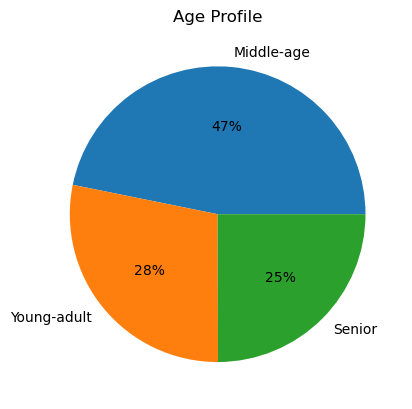

In [33]:
# age profile pie chart
age_profile = df['age_flag'].value_counts().plot.pie(title = 'Age Profile', label = '', autopct = ('%1.f%%'))

In [34]:
# export pie chart
age_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_profile.png'))

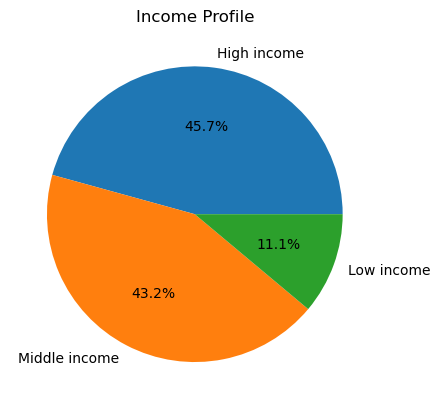

In [35]:
# income profile pie chart
income_profile = df['income_flag'].value_counts().plot.pie(title = 'Income Profile', label = '', autopct = '%1.1f%%')

In [36]:
# export pie chart
income_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income_profile.png'))

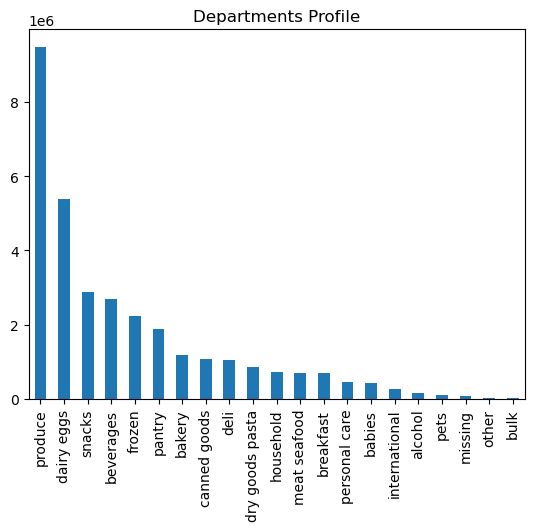

In [37]:
# departments profile bar chart
departments_profile = df_merged['department'].value_counts().plot.bar(title = 'Departments Profile')

In [38]:
# export bar chart
departments_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_profile.png'))

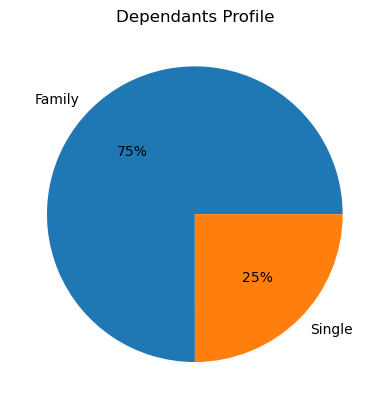

In [39]:
# dependants profile pie chart
dependants_profile = df_merged['family_flag'].value_counts().plot.pie(title = 'Dependants Profile', label = '', autopct = ('%1.f%%'))

In [40]:
# export pie chart
dependants_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dependants_profile.png'))

# 07. Aggregate profile on frequency and expenditure

In [41]:
# aggregate age profile 'prices' and 'days_since_prior_order'
df_merged.groupby('age_flag').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices                
                               max       mean  min      max       mean  min
age_flag                                                                   
Middle-age                    30.0  10.392906  0.0  99999.0  11.968400  1.0
Senior                        30.0  10.370671  0.0  99999.0  11.838480  1.0
Young-adult                   30.0  10.411732  0.0  99999.0  12.125184  1.0

In [42]:
# aggregate income profile 'prices' and 'days_since_prior_order'
df_merged.groupby('income_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices                
                                 max       mean  min      max       mean  min
income_flag                                                                  
High income                     30.0  10.346482  0.0  99999.0  16.579815  1.0
Low income                      30.0  10.741617  0.0     25.0   6.696985  1.0
Middle income                   30.0  10.351952  0.0  99999.0   8.468592  1.0

In [43]:
# aggregate department profile 'prices' and 'days_since_prior_order'
df_merged.groupby('department').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices             \
                                   max       mean  min      max       mean   
department                                                                   
alcohol                           30.0   9.485471  0.0     15.0   8.143701   
babies                            30.0   9.473627  0.0     15.0   7.638380   
bakery                            30.0  10.385240  0.0     15.0   7.853809   
beverages                         30.0  10.364676  0.0     15.0   7.680502   
breakfast                         30.0  10.544440  0.0     14.9   8.028963   
bulk                              30.0   9.589564  0.0     14.1   8.348960   
canned goods                      30.0  10.851046  0.0     15.0   7.539976   
dairy eggs                        30.0  10.310359  0.0  99999.0  33.479533   
deli                              30.0  10.589108  0.0     15.0   7.778701   
dry goods pasta                   30.0  10.945917  0.0     15.0   7.350283   
frozen                            30.0  10.900348  0.0     15.0   7.736553   
household                         30.0  11.150964  0.0     15.0   7.384058   
international                     30.0  10.496154  0.0     15.0   7.682264   
meat seafood                      30.0  10.668190  0.0     25.0  16.294443   
missing                           30.0   9.883679  0.0     15.0   8.660716   
other                             30.0  10.238792  0.0     15.0   6.990934   
pantry                            30.0  10.399840  0.0     20.0   8.009443   
personal care                     30.0  10.782118  0.0     15.0   7.996769   
pets                              30.0  11.062978  0.0     15.0   7.889070   
produce                           30.0  10.186943  0.0     15.0   7.981708   
snacks                            30.0  10.261979  0.0      7.0   4.275437   

                      
                 min  
department            
alcohol          1.0  
babies           1.0  
bakery           1.0  
beverages        1.0  
breakfast        1.0  
bulk             1.4  
canned goods     1.0  
dairy eggs       1.0  
deli             1.0  
dry goods pasta  1.0  
frozen           1.0  
household        1.0  
international    1.0  
meat seafood     8.0  
missing          1.0  
other            1.1  
pantry           1.0  
personal care    1.0  
pets             1.0  
produce          1.0  
snacks           1.6

In [44]:
# aggregate dependants profile 'prices' and 'days_since_prior_order'
df_merged.groupby('family_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices                
                               max       mean  min      max       mean  min
family_flag                                                                
Family                        30.0  10.399639  0.0  99999.0  11.930584  1.0
Single                        30.0  10.371750  0.0  99999.0  12.129243  1.0

# 08. Compare profiles with regions and departments

In [45]:
# link between age and region
age_region = pd.crosstab(df['region'], df['age_flag'], dropna = False)

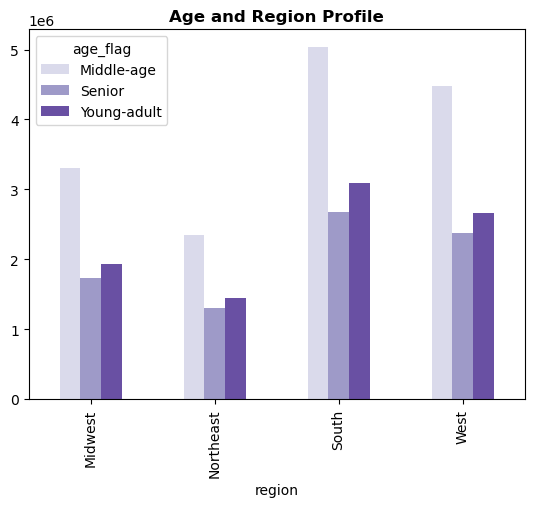

In [46]:
# bar chart age_region
bar_age_region = age_region.plot.bar(color = sns.color_palette('Purples', 3))
plt.title('Age and Region Profile', fontweight = 'bold')
plt.show()

In [47]:
# export chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))

In [48]:
# link between age and department
age_department = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

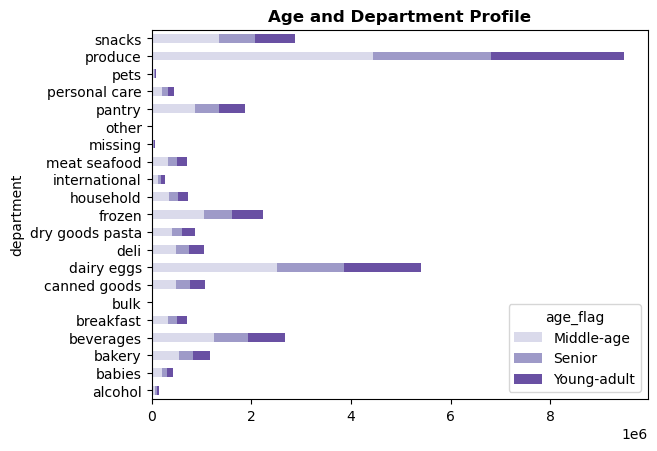

In [49]:
# stacked bar chart age_department
stacked_age_department = age_department.plot.barh(stacked = True, color = sns.color_palette('Purples', 3))
plt.title('Age and Department Profile', fontweight = 'bold')
plt.show()

In [50]:
# export chart
stacked_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_age_department.png'))

In [51]:
# link between income and region
income_region = pd.crosstab(df_merged['region'], df_merged['income_flag'], dropna = False)

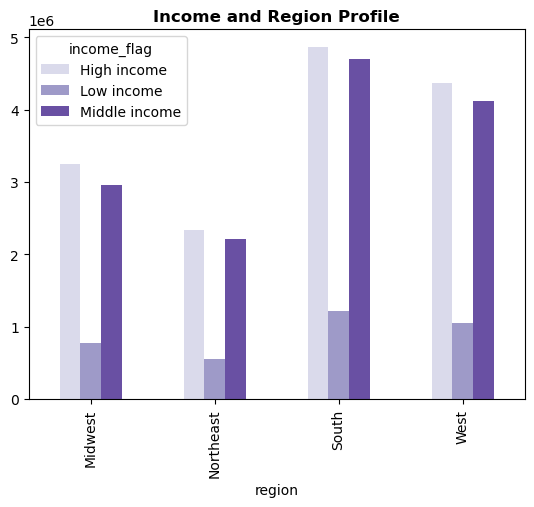

In [52]:
# bar chart income_region
bar_income_region = income_region.plot.bar(color = sns.color_palette('Purples', 3))
plt.title('Income and Region Profile', fontweight = 'bold')
plt.show()

In [53]:
# export chart
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))

In [54]:
# link income and department
income_dept = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

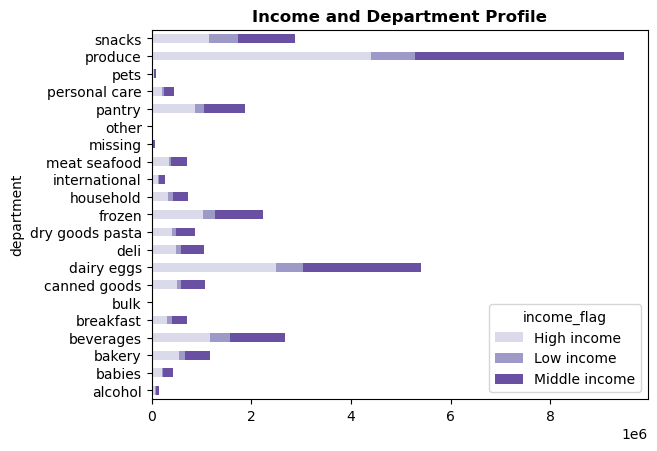

In [55]:
# stacked bar chart income_dept
stacked_income_dept = income_dept.plot.barh(stacked = True, color = sns.color_palette('Purples', 3))
plt.title('Income and Department Profile', fontweight = 'bold')
plt.show()

In [56]:
# export chart
stacked_income_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_income_dept.png'))

In [57]:
# link dependants and region
dependant_region = pd.crosstab(df_merged['region'], df_merged['family_flag'], dropna = False)

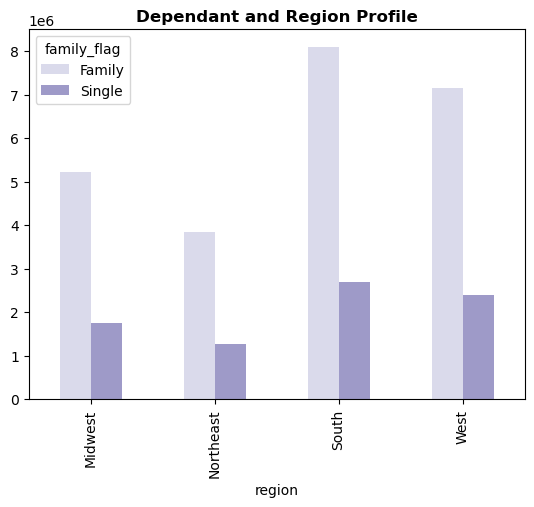

In [58]:
# bar chart dependant_region
bar_dependant_region = dependant_region.plot.bar(color = sns.color_palette('Purples', 3))
plt.title('Dependant and Region Profile', fontweight = 'bold')
plt.show()

In [59]:
# export chart
bar_dependant_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_region.png'))

In [60]:
# link dependants and departments
dependant_dept = pd.crosstab(df_merged['department'],df_merged['family_flag'], dropna = False)

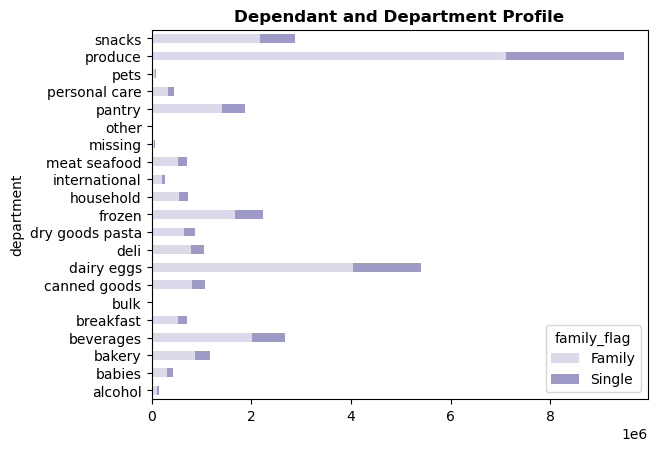

In [61]:
# stacked bar chart dependant_dept
stacked_dependant_dept = dependant_dept.plot.barh(stacked = True, color = sns.color_palette('Purples', 3))
plt.title('Dependant and Department Profile', fontweight = 'bold')
plt.show()

In [62]:
# export chart
stacked_dependant_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_dependant_dept.png'))

# 09. Export dataframe

In [63]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))